# Sentiment Analysis of Restuarant Reviews
## Problem Statement
Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of above 1000 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

Importing Dataset Preprocessing Dataset Vectorization Training and Classification Analysis Conclusion

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('r_data.tsv', delimiter='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [16]:
df.shape

(1000, 2)

In [17]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(4)

In [19]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.shape

(996, 2)

In [54]:
df.dtypes

Review    object
Liked      int64
dtype: object

<Axes: xlabel='Liked', ylabel='count'>

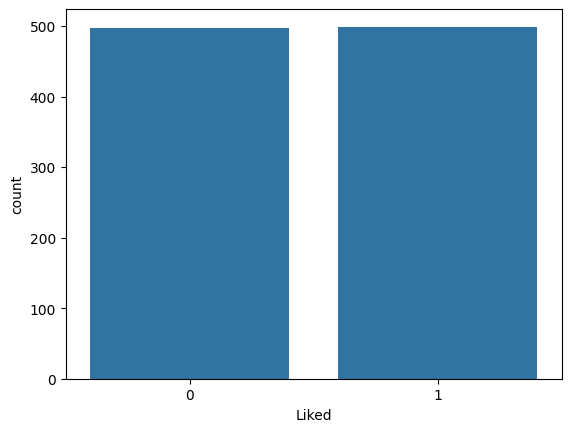

In [55]:
sns.countplot(x=df['Liked'])

In [56]:
# text cleaning

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# remove special character or digit
# convert in lower case
# tokenisation >> split text 
# remove stopwords >> most common words(a,an,the)
# stemming >> to get root word

In [57]:
s_list = stopwords.words('english')
len(s_list)

198

In [58]:
corpus=[]
for i in df['Review']:
    # remove special characters or digits
    mystr = re.sub(r'[^A-Za-z\s]','',i)
    mystr=mystr.lower()  #lowercase
    # tokenization
    list1 = mystr.split()
    # remove stowords
    list2 =[ i for i in list1 if i not in s_list]
    # stemming
    ps=PorterStemmer()
    list3 = [ps.stem(i) for i in list2]
    final_str = ' '.join(list3)
    corpus.append(final_str)

In [59]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

# vectorization
From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cv=CountVectorizer()
X = cv.fit_transform(corpus).toarray()
pickle.dump(cv, open('cv_rest', 'wb'))
y=df['Liked']

In [61]:
X.shape

(996, 1609)

In [62]:
cv.get_feature_names_out()

array(['absolut', 'absolutley', 'accid', ..., 'yum', 'yummi', 'zero'],
      shape=(1609,), dtype=object)

In [31]:
import pickle

 # Training and Classification
 Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.

Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

Multinomial Naive Bayes Bernoulli Naive Bayes Logistic Regression

In [63]:
#Splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=73)

In [33]:
# model training

In [64]:
#Multinominal NB

#Fitting naive bays to training set
from sklearn.naive_bayes import MultinomialNB
classifier1=MultinomialNB(alpha=0.1)
classifier1.fit(X_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",0.1
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [65]:
#predicting the test results
y_pred = classifier1.predict(X_test)

In [66]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [67]:

confusion_matrix(y_test, y_pred)

array([[82, 26],
       [18, 74]])

In [68]:
accuracy_score(y_test, y_pred)

0.78

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       108
           1       0.74      0.80      0.77        92

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

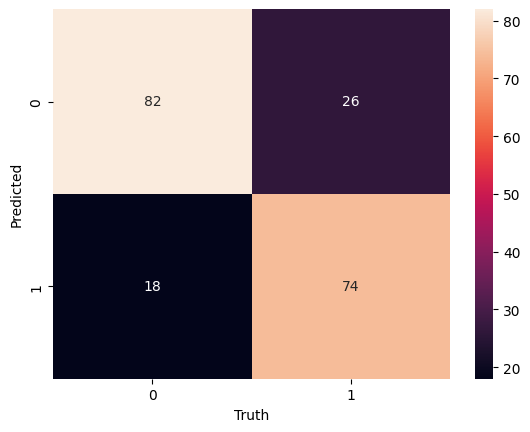

In [71]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [72]:
with open('model_rest', 'wb') as f:
    pickle.dump(classifier1,f)

In [73]:
a=['good taste I liked it']
a_sc = cv.transform(a).toarray()

In [74]:
classifier1.predict(a_sc)

array([1])

In [75]:
a='not Bad test'
b=[a]
a_sc = cv.transform(b).toarray()
result = classifier1.predict(a_sc)
result

array([0])

In [76]:
if "not" in a:
    result[0] = abs(result[0]-1)
print(result[0])

1


In [77]:
#Bernaulli NB

#Fitting naive bays to training set
from sklearn.naive_bayes import BernoulliNB
classifier2=BernoulliNB(alpha=1.0)
classifier2.fit(X_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [78]:
y_pred=classifier2.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [80]:
confusion_matrix(y_test, y_pred)

array([[80, 28],
       [12, 80]])

In [81]:
accuracy_score(y_test, y_pred)

0.8

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       108
           1       0.74      0.87      0.80        92

    accuracy                           0.80       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.80      0.80       200



# Conclusion
In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.

Using Multinomial Naive Bayes, Accuracy of prediction is 79.8%. Precision of prediction is 0.79. Recall of prediction is 0.84.

In [53]:
# GUI and flask